# Скачивание датасета

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c passenger-satisfaction-2024

 79% 2.00M/2.55M [00:00<00:00, 2.65MB/s]
100% 2.55M/2.55M [00:00<00:00, 3.01MB/s]


In [ ]:
! unzip passenger-satisfaction-2024.zip -d passenger-satisfaction

Archive:  passenger-satisfaction-2024.zip
  inflating: passenger-satisfaction/sample_submit.csv  
  inflating: passenger-satisfaction/test.csv  
  inflating: passenger-satisfaction/train.csv  


# Обработка данных

In [ ]:
df = pd.read_csv('/content/passenger-satisfaction/train.csv')

In [ ]:
df.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied
5,38519,Male,31,Returning,Business,Business,2585,10,0.0,1,...,5,3,2,3,3,5,5,3,4,Satisfied
6,4955,Female,21,Returning,Business,Business,1671,0,2.0,2,...,5,4,2,4,4,4,2,4,3,Satisfied
7,63743,Female,55,Returning,Business,Business,1121,0,2.0,4,...,2,3,2,4,3,2,2,2,2,Neutral or Dissatisfied
8,45706,Female,50,Returning,Business,Business,67,0,0.0,4,...,5,5,5,4,4,5,4,5,4,Satisfied
9,26292,Male,27,First-time,Business,Business,806,0,0.0,1,...,4,3,4,3,3,5,0,3,4,Satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

In [ ]:
df['Satisfaction'].value_counts()

,count
Satisfaction,
Satisfied,51914
Neutral or Dissatisfied,33053


In [ ]:
df = df.drop(columns = ['Arrival Delay', 'ID'])

In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Departure and Arrival Time Convenience,0
Ease of Online Booking,0
Check-in Service,0


Пропусков нет

In [ ]:
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0])

<ipython-input-132-c907dd189b7a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0])


In [ ]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,46,Returning,Business,Business,1608,0,1,1,5,...,5,5,5,3,2,5,1,5,5,Satisfied
1,1,30,Returning,Business,Business,1379,30,5,5,1,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,0,50,Returning,Business,Business,414,0,5,4,4,...,4,5,4,5,3,4,5,4,4,Satisfied
3,0,48,Returning,Business,Economy,95,0,3,3,1,...,5,1,5,2,1,5,5,5,5,Satisfied
4,0,24,Returning,Business,Economy Plus,143,0,5,0,4,...,5,1,2,1,1,3,0,1,5,Satisfied


In [ ]:
# !pip install category_encoders
# from category_encoders import BinaryEncoder, OneHotEncoder

In [ ]:
# features = ['Customer Type', 'Class', 'Type of Travel']
# encoder = OneHotEncoder(handle_unknown='ignore')
# combined_encoded = encoder.fit_transform(df[features])

In [ ]:
# combined_encoded

In [ ]:
# df = df.drop(columns = ['Customer Type', 'Class', 'Type of Travel'])

In [ ]:
# df = pd.concat([df, combined_encoded])

In [ ]:
df['Customer Type'] = df['Customer Type'].replace(['Returning', 'First-time'], [1, 0])

<ipython-input-139-03a22f9cc9f8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Type'] = df['Customer Type'].replace(['Returning', 'First-time'], [1, 0])


In [ ]:
df['Type of Travel'] = df['Type of Travel'].replace(['Business', 'Personal'], [1, 0])

<ipython-input-140-3e8ed595640e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type of Travel'] = df['Type of Travel'].replace(['Business', 'Personal'], [1, 0])


In [ ]:
df['Class'] = df['Class'].replace(['Business', 'Economy Plus', 'Economy'], [2, 1, 0])

<ipython-input-141-a946372cbef3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace(['Business', 'Economy Plus', 'Economy'], [2, 1, 0])


In [ ]:
df['Satisfaction'] = df['Satisfaction'].replace(['Satisfied', 'Neutral or Dissatisfied'], [1, 0])

<ipython-input-142-f95969df9b13>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Satisfaction'] = df['Satisfaction'].replace(['Satisfied', 'Neutral or Dissatisfied'], [1, 0])


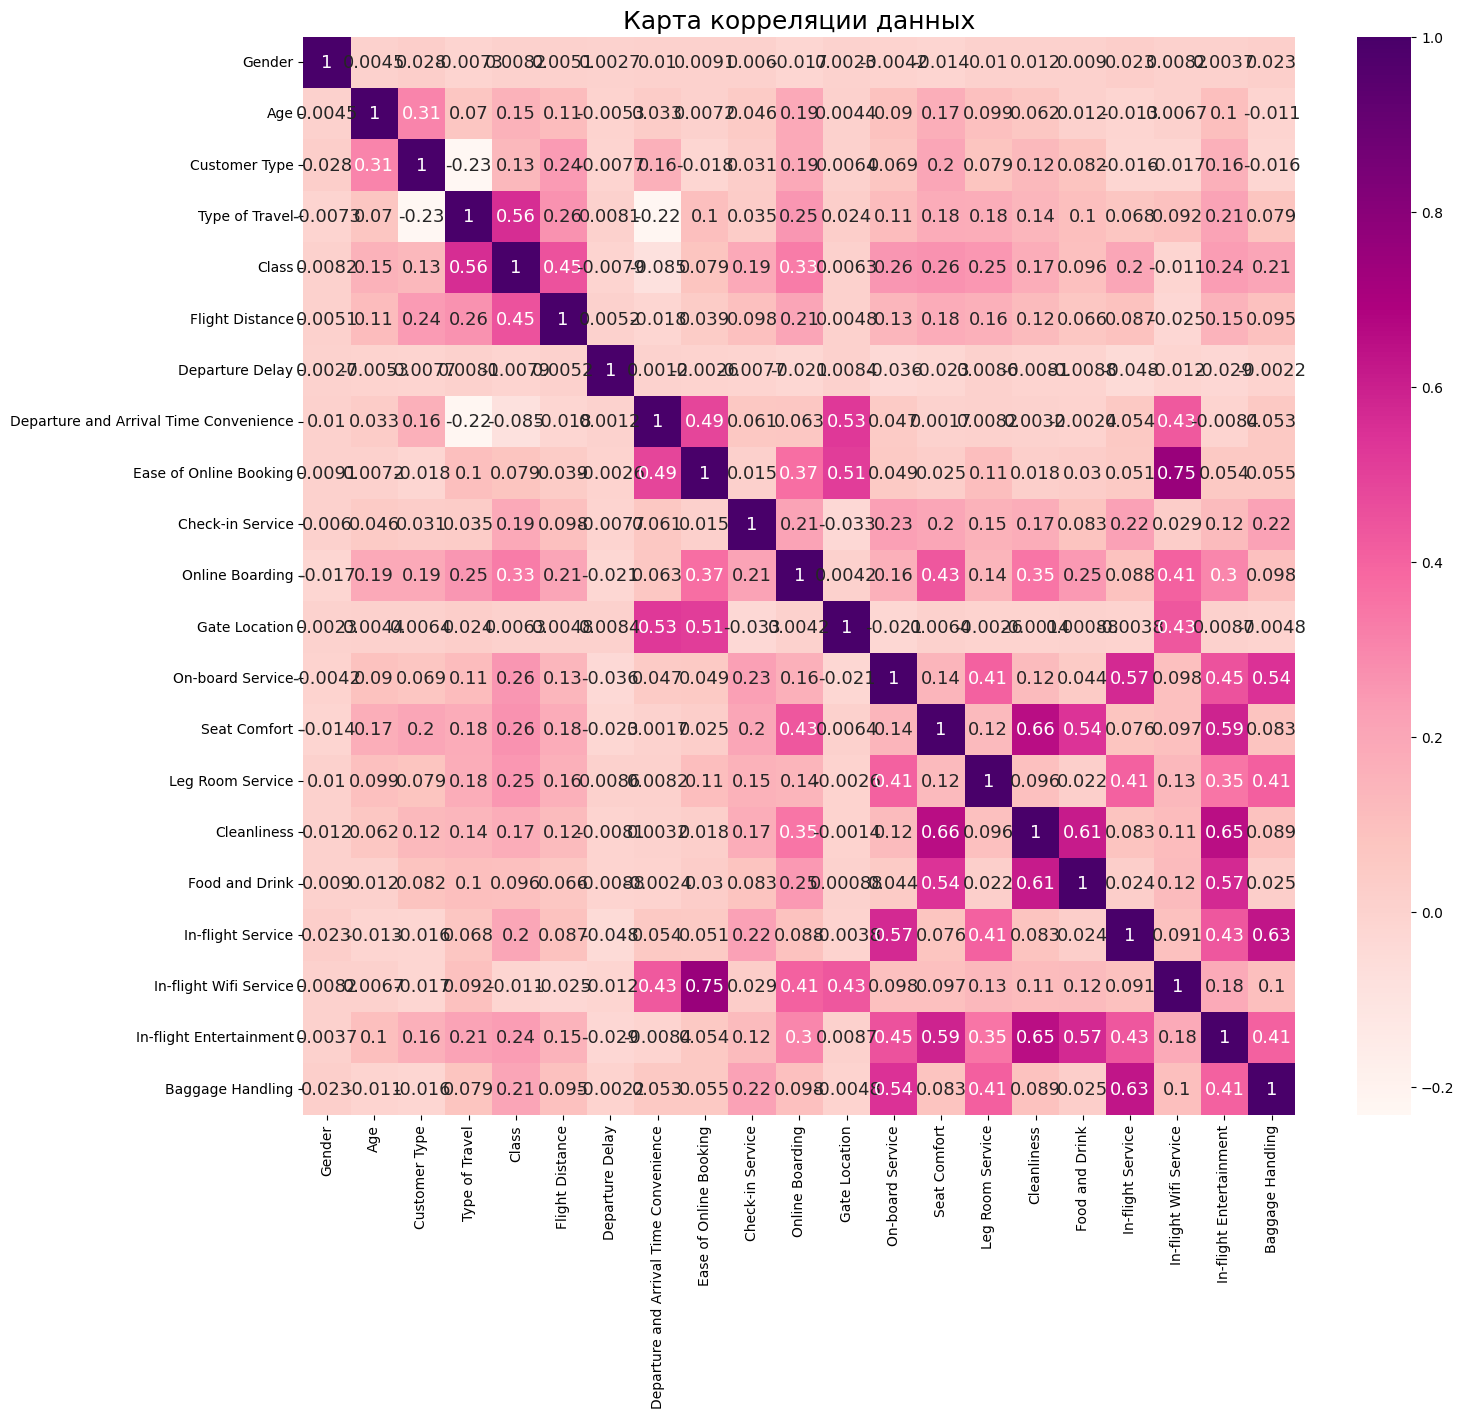

In [ ]:
plt.figure(figsize=(16, 14))
df1 = df.drop(columns = ['Satisfaction'])
dataplot = sns.heatmap(df1.corr(), cmap="RdPu", annot=True,annot_kws={'fontsize': 13})

plt.title("Карта корреляции данных", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Классы неравноценны + масштабирование

нарисовать матрицу ошибок

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(
    sampling_strategy='auto',  # Стратегия выборки. 'auto' означает увеличение меньшего класса до размера большинственного.
    random_state=42,         # Зерно для генератора случайных чисел.
    k_neighbors=5,             # Количество ближайших соседей для создания синтетических примеров.
    n_jobs=1                   # Количество ядер для параллельной работы. -1 означает использование всех доступных ядер.
)

In [ ]:
X = df.drop(['Satisfaction'], axis=1)
y = df['Satisfaction']

In [ ]:
mmsc = MinMaxScaler()

X_norm = mmsc.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=X.columns)

In [ ]:
# std = StandardScaler()

# X_std = std.fit_transform(X)

# X_std = pd.DataFrame(X_std, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (59476, 21), (59476,)
Test dataset size: (25491, 21), (25491,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler, ADASYN

# # Создание экземпляра RandomOverSampler
# ros = RandomOverSampler()

# # Применение увеличения выборки к данным
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# Создание экземпляра ADASYN
adasyn = ADASYN()

# Применение ADASYN к данным
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

,count
Satisfaction,
1,36332
0,35749


# Обучение


In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [ ]:
model = clf#xgb.XGBClassifier() #RandomForestClassifier() #LogisticRegression()

model.fit(X_resampled, y_resampled)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

MAE 0.1457377113491036
MSE 0.1457377113491036
R2 Score: 0.8542622886508964


# Результат

In [ ]:
df1 = pd.read_csv('/content/passenger-satisfaction/test.csv')

In [ ]:
id = df1['ID']

In [ ]:
df1 = df1.drop(columns = ['Arrival Delay', 'ID'])

In [ ]:
# features = ['Customer Type', 'Class', 'Type of Travel']
# encoder = OneHotEncoder(handle_unknown='ignore')
# combined_encoded = encoder.fit_transform(df1[features])

In [ ]:
# df1 = df1.drop(columns = ['Customer Type', 'Class', 'Type of Travel'])

In [ ]:
# df1 = pd.concat([df1, combined_encoded])

In [ ]:
df1['Gender'] = df1['Gender'].replace(['Male', 'Female'], [1, 0])
df1['Customer Type'] = df1['Customer Type'].replace(['Returning', 'First-time'], [1, 0])
df1['Type of Travel'] = df1['Type of Travel'].replace(['Business', 'Personal'], [1, 0])
df1['Class'] = df1['Class'].replace(['Business', 'Economy Plus', 'Economy'], [2, 1, 0])

<ipython-input-186-ab58a1f127f4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'] = df1['Gender'].replace(['Male', 'Female'], [1, 0])
<ipython-input-186-ab58a1f127f4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Customer Type'] = df1['Customer Type'].replace(['Returning', 'First-time'], [1, 0])
<ipython-input-186-ab58a1f127f4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [ ]:
df1.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,0,46,0,1,0,978,0,3,3,1,...,1,4,5,4,5,5,1,3,5,2
1,0,21,0,1,0,1005,0,1,1,4,...,3,3,4,4,4,4,4,1,4,4
2,0,39,1,0,0,954,18,5,1,3,...,2,4,5,3,3,3,5,1,3,5
3,1,22,1,0,2,765,0,5,2,4,...,3,5,2,2,2,2,5,2,2,5
4,1,48,1,1,2,2123,9,4,4,3,...,4,2,4,2,3,1,2,2,2,2


In [ ]:
X_norm = mmsc.fit_transform(df1)

X_norm = pd.DataFrame(X_norm, columns=X.columns)

In [ ]:
# std = StandardScaler()

# X_std = std.fit_transform(df1)

# X_std = pd.DataFrame(X_std, columns=X.columns)

In [ ]:
predictions = model.predict(X_norm)

In [ ]:
ans = pd.DataFrame({'ID': id, 'Satisfaction': predictions})
#ans.index.name = 'index'
ans.to_csv('ans.csv', index=False)